## Importación de librerias y lectura csv ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\augus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [29]:
df = pd.read_csv("1000_Companies.csv")
df

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [31]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
colors = {
    'New York': '#A8A77A',
    'California': '#EE8130',
    'Florida': '#6390F0',
}

## Análisis de estadísticas ##

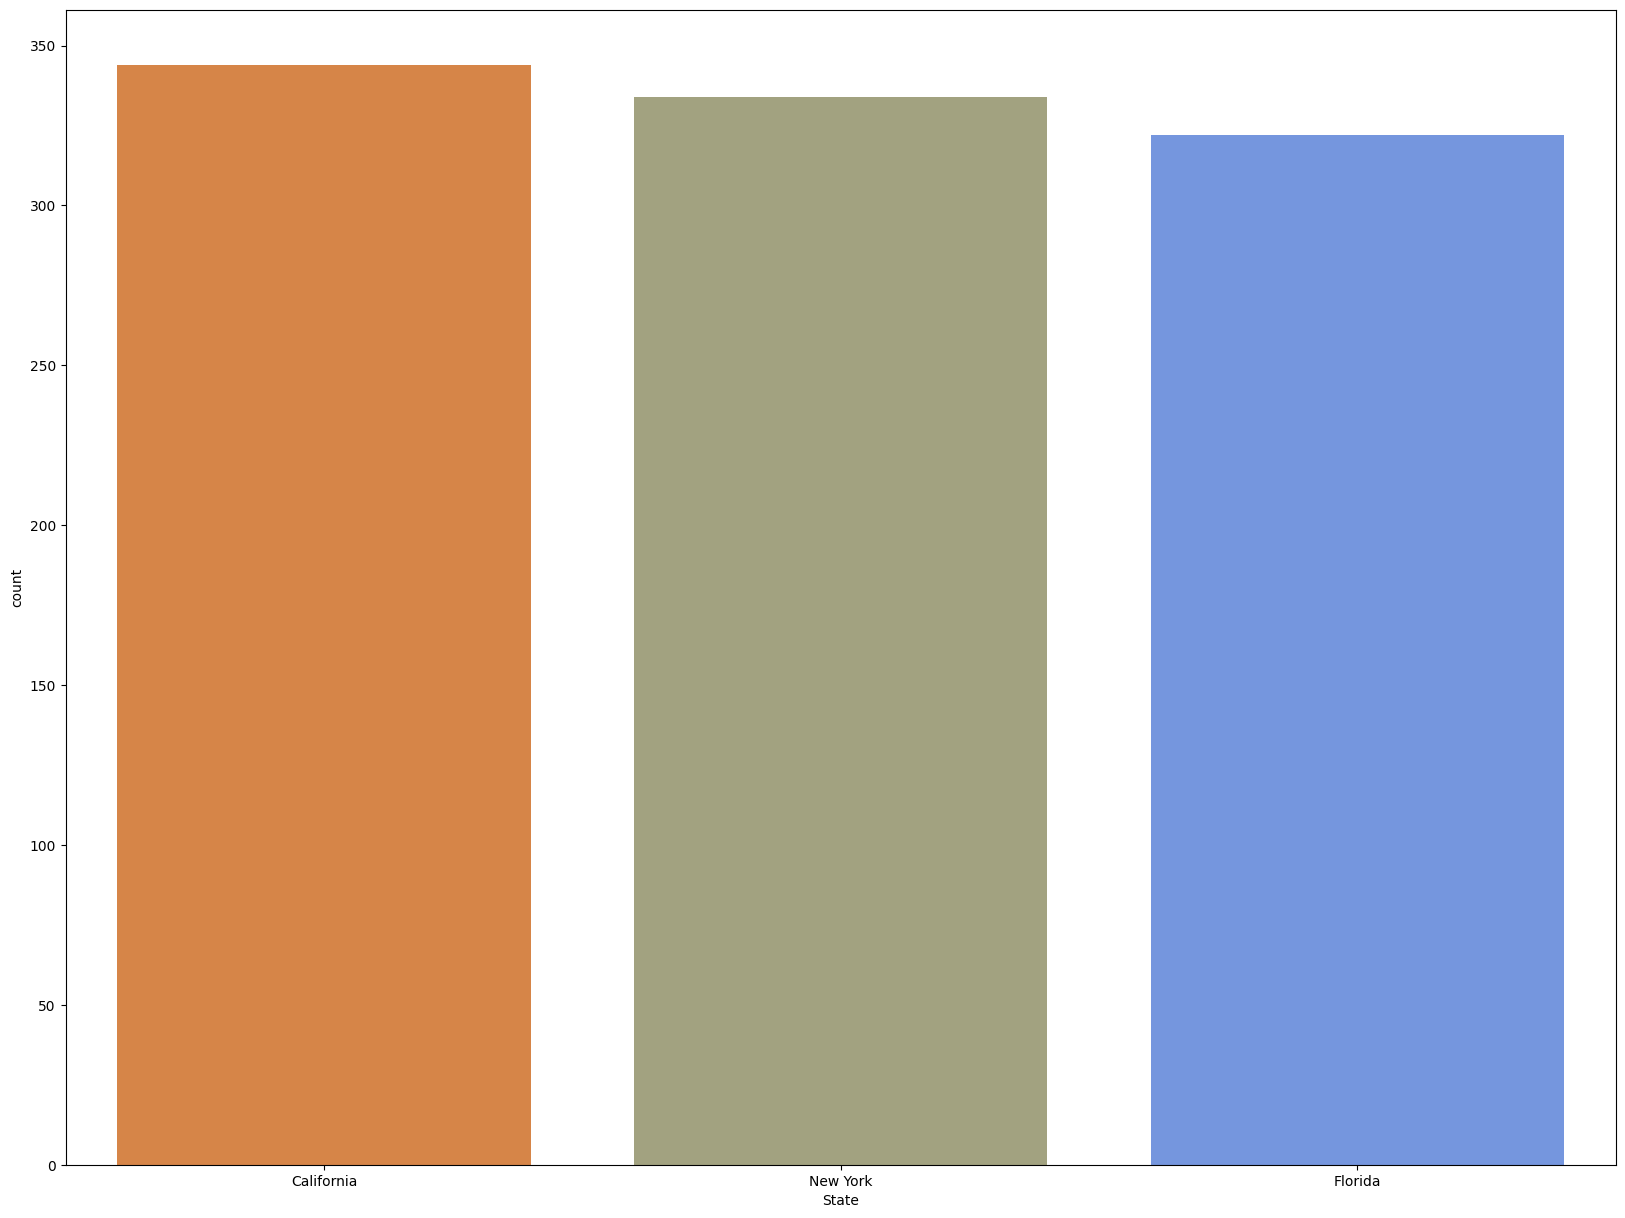

In [12]:
plt.figure(figsize=(20, 15))
sns.countplot(x='State', data=df, palette=colors, order=df['State'].value_counts().index)
# plt.xticks(rotation=-45)
plt.show()

Vemos que el dataset tiene una distribución balanceada

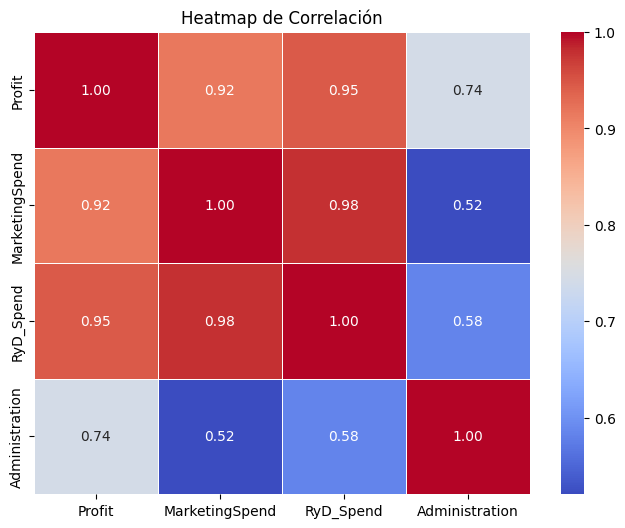

In [25]:
# Filtra las columnas de interés
columns_of_interest = ["Profit", "MarketingSpend", "RyD_Spend", "Administration"]
df_subset = df[columns_of_interest]

# Calcula la matriz de correlación
correlation_matrix = df_subset.corr()

# Crea un heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()

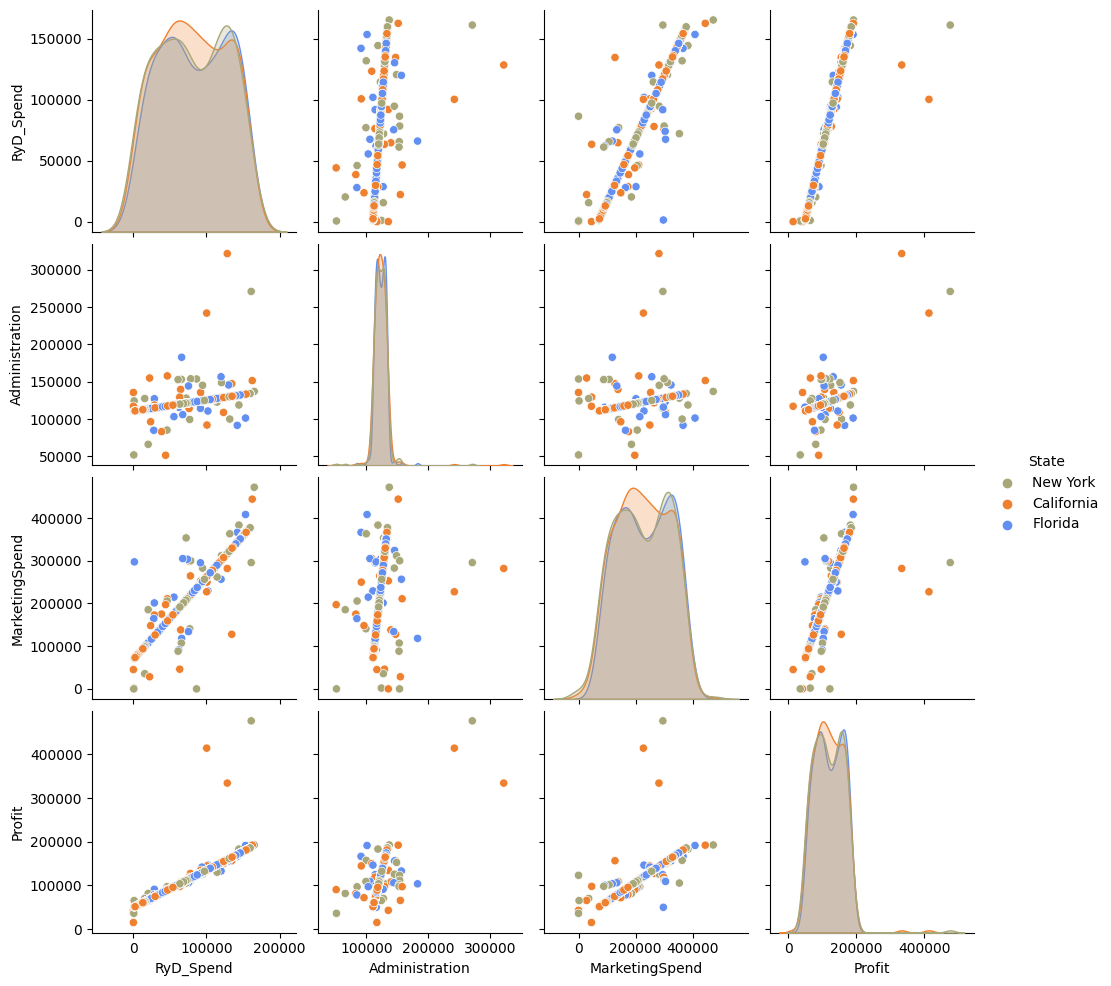

In [13]:
sns.pairplot(df, hue="State", palette=colors)

RyD_Spend

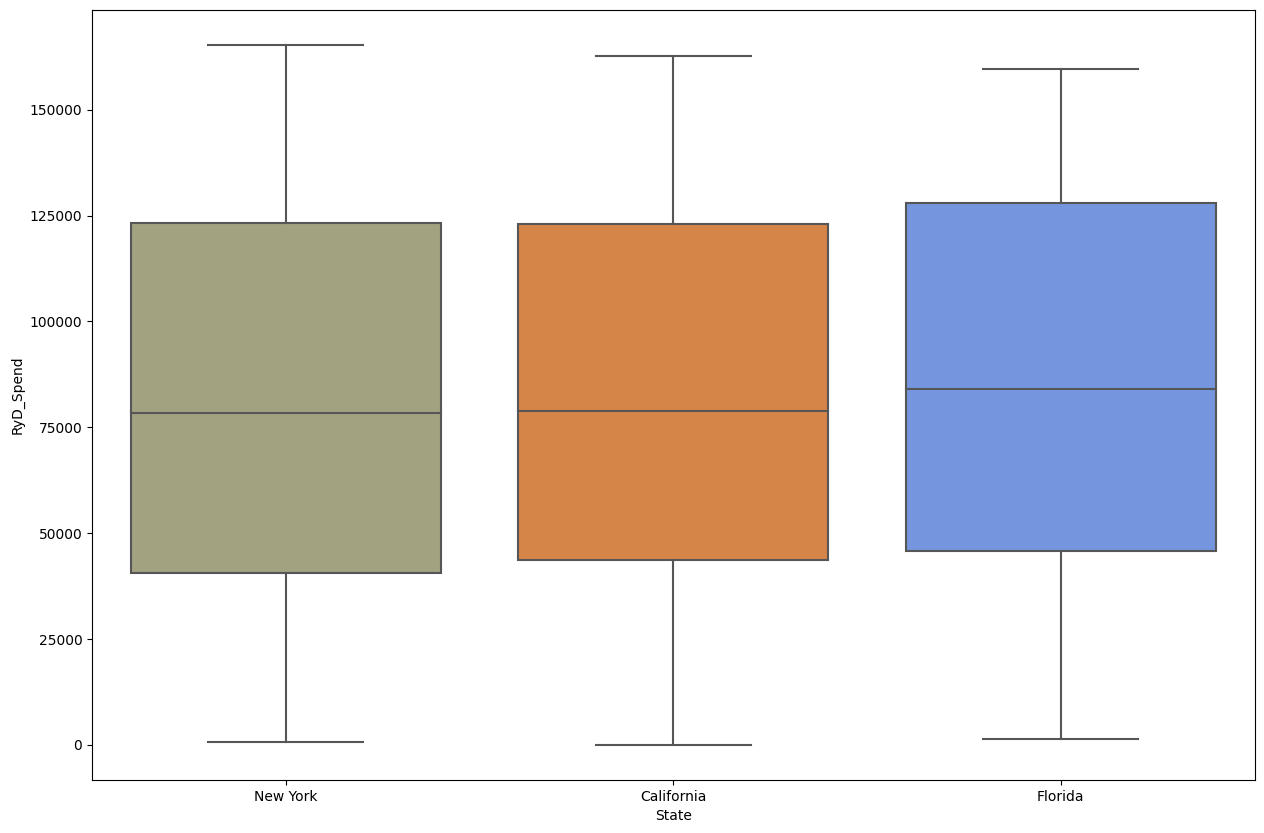

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='RyD_Spend', data=df, palette=colors)
# plt.xticks(rotation=90)
plt.show()

Administration

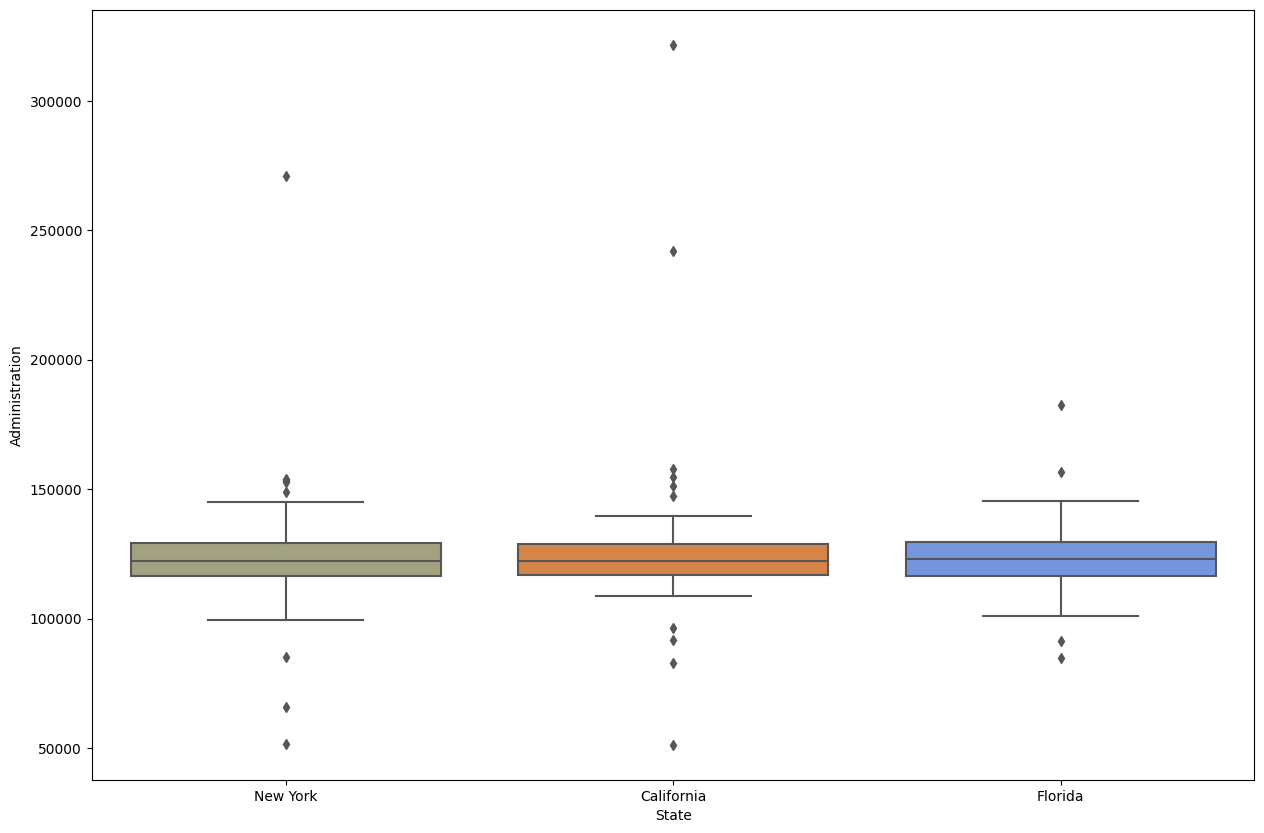

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='Administration', data=df, palette=colors)
# plt.xticks(rotation=90)
plt.show()

MarketingSpend

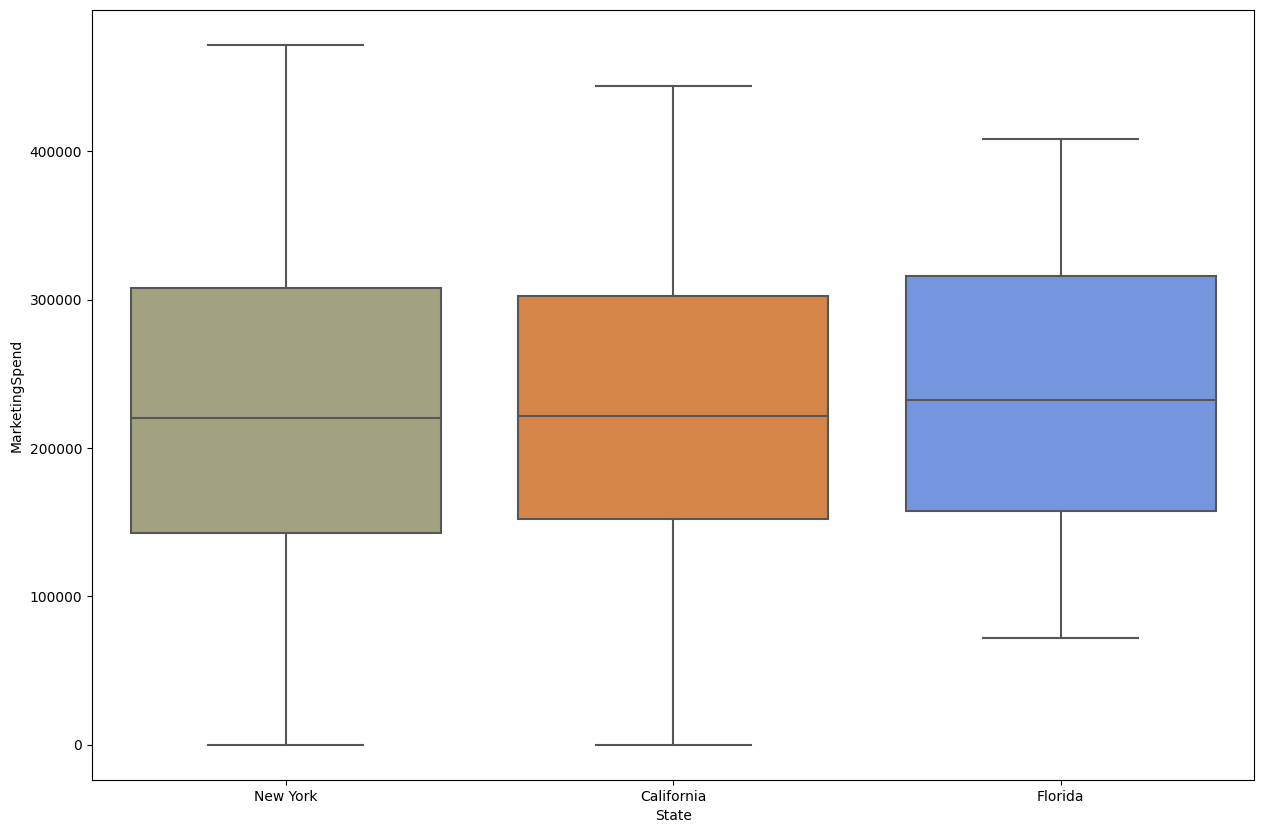

In [19]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='MarketingSpend', data=df, palette=colors)
plt.show()

Profit

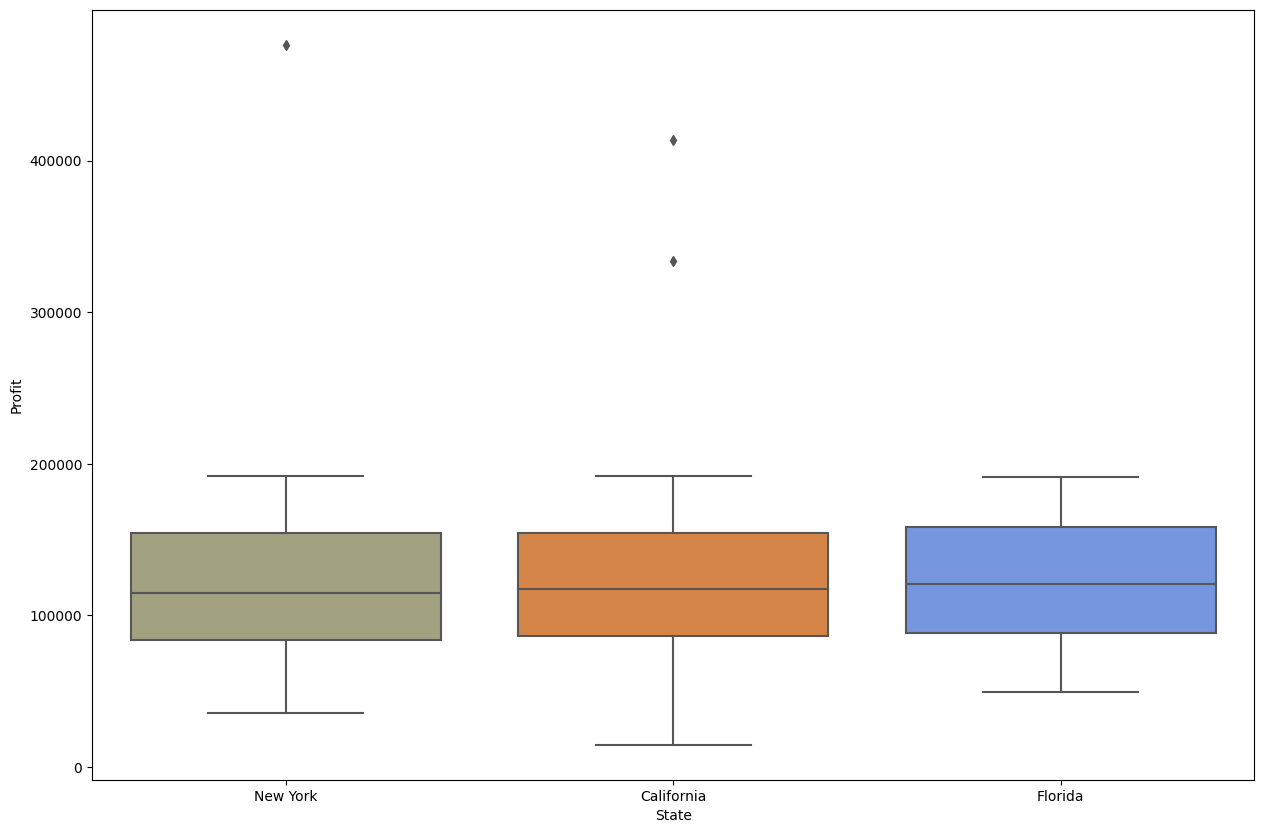

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(x='State', y='Profit', data=df, palette=colors)
plt.show()

Observamos que las 

In [35]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from graphviz import Source

In [32]:
df = pd.get_dummies(df, columns=["State"], drop_first=True)

In [33]:
df

,RyD_Spend,Administration,MarketingSpend,Profit,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,192261.83000,0,1
1,162597.70,151377.590,443898.5300,191792.06000,0,0
2,153441.51,101145.550,407934.5400,191050.39000,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,1
4,142107.34,91391.770,366168.4200,166187.94000,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,0,0
996,134970.00,130390.080,329204.0228,164336.60550,0,0
997,100275.47,241926.310,227142.8200,413956.48000,0,0
998,128456.23,321652.140,281692.3200,333962.19000,0,0


In [36]:
""" Decision Tree - Regression """

xCompanies = df.drop('Profit', axis=1)
yCompanies = df['Profit']
xTrain, xTest, yTrain, yTest = train_test_split(xCompanies, yCompanies, test_size=0.2)
tree_reg = DecisionTreeRegressor(max_depth=5, criterion='squared_error', random_state=13,
min_samples_leaf=1, min_samples_split=2)
tree_reg.fit(xTrain, yTrain)
yCompaniesPred = tree_reg.predict(xTest)

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, yCompaniesPred))
print('Mean Squared Error:', metrics.mean_squared_error(yTest, yCompaniesPred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, yCompaniesPred)))

Mean Absolute Error: 1987.2094558310823
Mean Squared Error: 8013327.766883528
Root Mean Squared Error: 2830.7821828751726


In [39]:
tableResult = pd.DataFrame({'Actual':yTest, 'Predicted':yCompaniesPred})
tableResult

,Actual,Predicted
263,110023.32300,107613.719550
19,122776.86000,123745.918676
787,65219.15775,66920.050675
833,177000.62080,172017.823961
706,53483.75718,53067.370952
...,...,...
435,67226.74247,66920.050675
716,127725.09450,130982.386734
551,144203.52070,146147.470679
310,180684.32520,182086.804858


In [41]:
export_graphviz(tree_reg, out_file="companies.dot", feature_names=xCompanies.columns, class_names=yCompanies, rounded=True,
filled=True)
Source.from_file("companies.dot")

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH